In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:

def u(x):
    # unit step 
    return np.array(x>=0,dtype=int)

def delta(n):
    return 1 if n == 0 else 0

def x(n):
    # x[n]=[n+2e^3n]u[n−2],−5<n<5,N =9
    return (n + 2 * np.exp(3 * n)) * u(n-2)

def y(n):
    # y[n]= n^2 if n<-3 ; if n>=-3 -> y[n]=0
    return np.where(n < -3, n**2, 0)

def z(n):
    func = []
    for n_val in n:
        current_sum = 0
        for m_val in range (n_val-2,n_val+3):
            current_sum += m_val * np.exp(np.pi * m_val)
        func.append(current_sum)
    return np.array(func)

N = 10
n1= np.arange(-4,5)        
n2= np.arange(-5,6)
n3= np.arange(-3,4)

period_x1= 9
period_x2= 11
period_x3= 7

xn= x(n1)
yn= y(n2)
zn = z(n3)

for i in range (0,9):
    print("X[{}]".format(i-4) + " : {}".format(xn[i]))
print("*********************************")

for i in range (0,11):
    print("Y[{}]".format(i-5) + " : {}".format(yn[i]))
print("*********************************")

for i in range (0,7):
    print("Z[{}]".format(i-3) + " : {}".format(zn[i]))
    

X[-4] : -0.0
X[-3] : -0.0
X[-2] : -0.0
X[-1] : -0.0
X[0] : 0.0
X[1] : 0.0
X[2] : 808.8575869854702
X[3] : 16209.167855150768
X[4] : 325513.58283800783
*********************************
Y[-5] : 25
Y[-4] : 16
Y[-3] : 0
Y[-2] : 0
Y[-1] : 0
Y[0] : 0
Y[1] : 0
Y[2] : 0
Y[3] : 0
Y[4] : 0
Y[5] : 0
*********************************
Z[-3] : -0.04720560515796168
Z[-2] : -0.04720485164932399
Z[-1] : 23.09350173049937
Z[0] : 1094.0770548785813
Z[1] : 38269.02421351413
Z[2] : 1185274.319974045
Z[3] : 34363394.316679694


In [10]:
import numpy as np

def dtfs_coefficients(signal,k,period,start_index):
    ak = np.complex128()
    for n in range(start_index,start_index+period):
        ak = ak + signal[n] * np.exp(-1j * k * (2*np.pi*n/period))
    ak = ak/period
    return ak



x1= []
for i in range (1,10):
    x1.append(dtfs_coefficients(xn,i,period=9,start_index=-4))
x1_array= np.array(x1)
print("Print out the dtfs coefficients for the function x1 for the k values: [1,2]")
for i in range(2):

    print("C[{}]: ".format(i+1) + " {}" .format (x1_array[i]))

y1=[]
for i in range (1,12):
    y1.append(dtfs_coefficients(yn,i,period=11,start_index=-5))
y1_array = np.array(y1)
print("Print out the dtfs coefficients for the function y1 for the k values: [1,2]")
for i in range(2):
    print("C[{}]: ".format(i+1) + " {}" .format (y1_array[i]))

z1= []
for i in range (1,8):
    z1.append(dtfs_coefficients(zn,i,period=7,start_index=-3))
z1_array= np.array(z1)
print("Print out the dtfs coefficients for the function z1 for the k values: [1,2]")
for i in range(2):
    print("C[{}]: ".format(i+1) + " {}" .format (z1_array[i]))


Print out the dtfs coefficients for the function x1 for the k values: [1,2]
C[1]:  (27974.237217650734+25099.944802771806j)
C[2]:  (4543.197361066154+36156.852309365226j)
Print out the dtfs coefficients for the function y1 for the k values: [1,2]
C[1]:  (3.4963687750271726-0.7863866435717782j)
C[2]:  (2.8769672916391076-1.3231010841520268j)
Print out the dtfs coefficients for the function z1 for the k values: [1,2]
C[1]:  (3018001.0601161798+4005435.380979954j)
C[2]:  (-1241421.1729278238+4708358.0778113445j)


## Q2

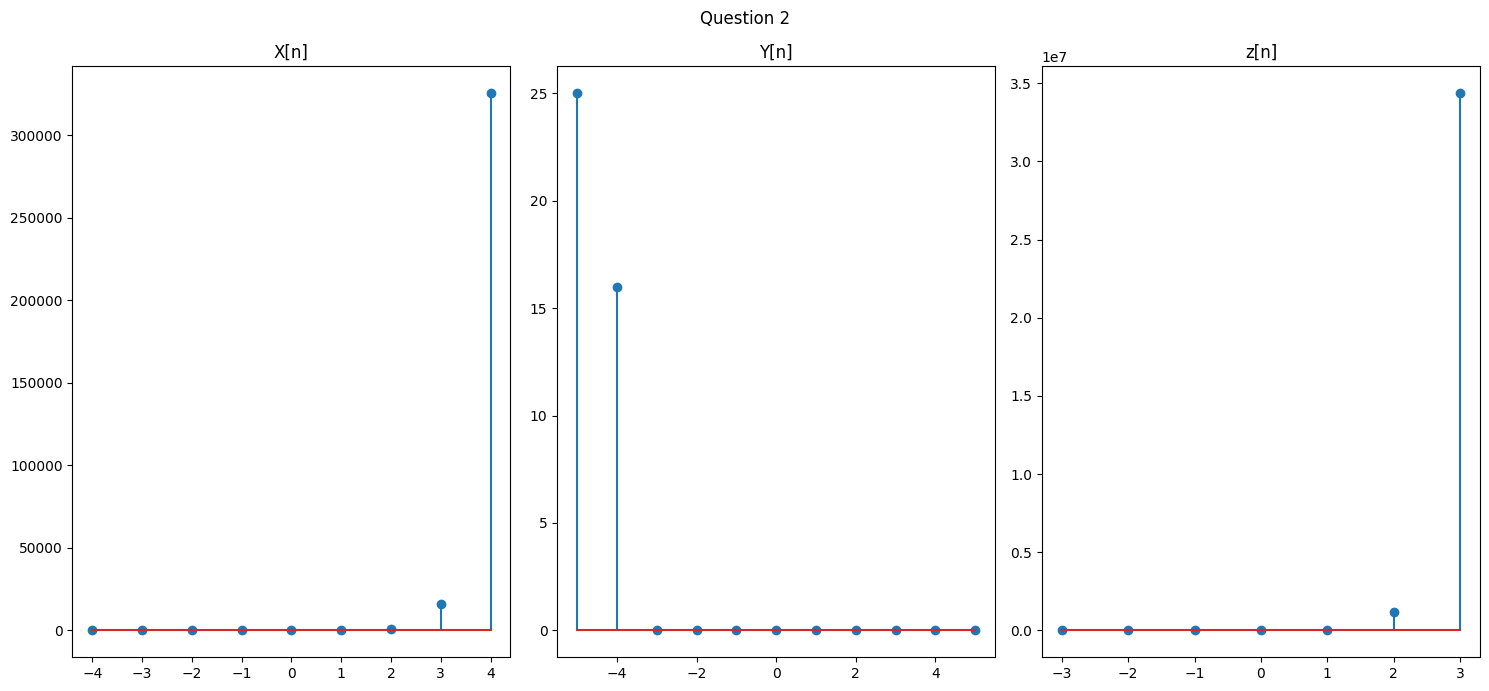

In [11]:

fig, ax = plt.subplots(1, 3, figsize=(15, 7))

ax[0].stem(n1,xn)
ax[0].set_title("X[n]")
ax[1].stem(n2,yn)
ax[1].set_title("Y[n]")
ax[2].stem(n3,zn)
ax[2].set_title("z[n]")

fig.suptitle("Question 2")
fig.tight_layout()

plt.show()

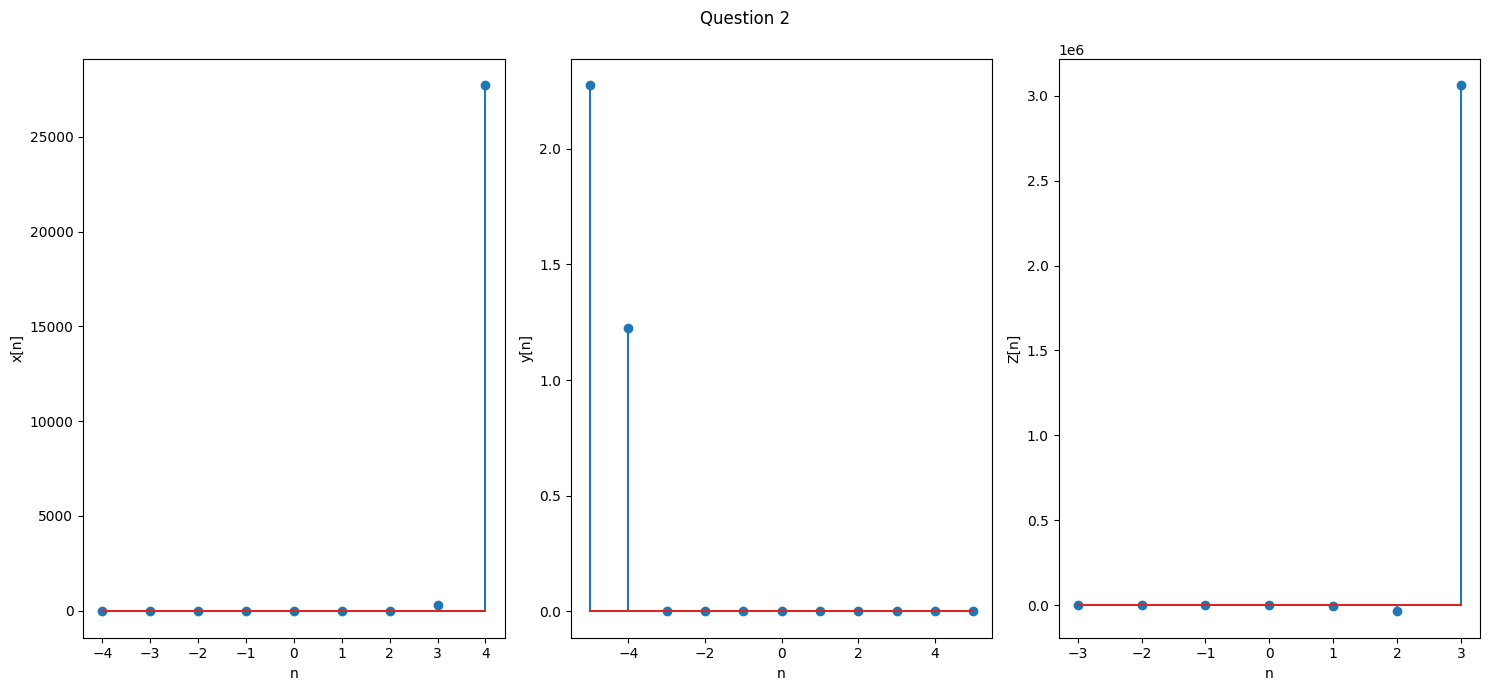

In [13]:

signal1 = np.fft.ifft(x1_array)
signal1 = np.real(signal1)

signal2 = np.fft.ifft(y1_array)
signal2 = np.real(signal2)

signal3 = np.fft.ifft(z1_array)
signal3 = np.real(signal3)
n1 = np.arange(-4, 5)
n2= np.arange(-5,6)
n3=np.arange(-3,4)
# Plot the graph
fig, ax = plt.subplots(1, 3, figsize=(15, 7))

ax[0].stem(n1, signal1)
ax[0].set_xlabel('n')
ax[0].set_ylabel('x[n]')
ax[1].stem(n2, signal2)
ax[1].set_xlabel('n')
ax[1].set_ylabel('y[n]')
ax[2].stem(n3, signal3)
ax[2].set_xlabel('n')
ax[2].set_ylabel('Z[n]')

fig.suptitle("Question 2")
fig.tight_layout()

plt.show()

## Q3 -Continious Time Fourier Series : 

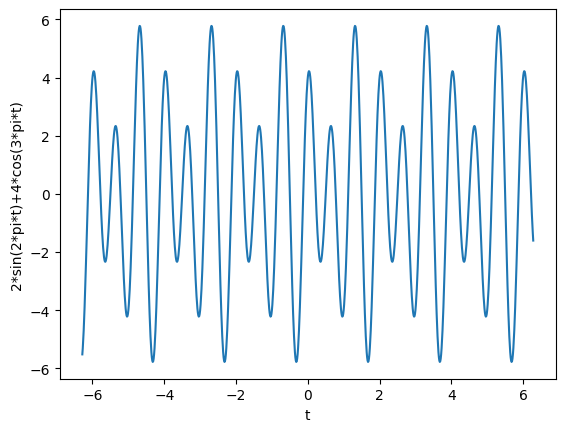

In [18]:
def q3(n):
    return (2*np.sin(2*np.pi*n)+ 4*np.cos(3*np.pi*n))


x = np.linspace(-2*np.pi, 2*np.pi, 1000)
plt.plot(x,q3(x))

plt.xlabel('t')
plt.ylabel('2*sin(2*pi*t)+4*cos(3*pi*t)')
plt.show()

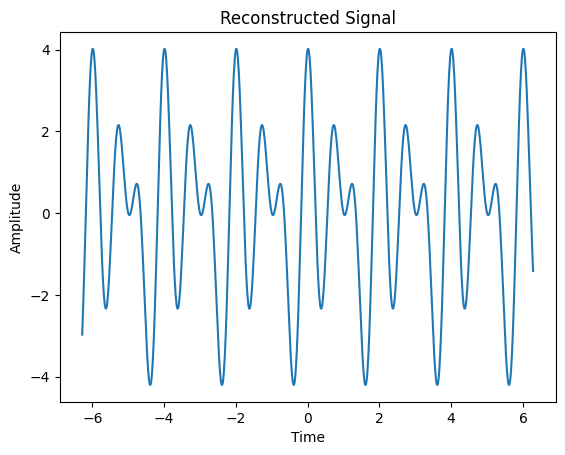

In [32]:

calculated_ctfs = [-1/1j, 1/1j, 2, 2]
period = 2
t = np.linspace(-2*np.pi, 2*np.pi, 1000)
w = 2 * np.pi / period
reconstructed_signal = np.zeros_like(t, dtype=complex)

for k, Xk in enumerate(calculated_ctfs):
    reconstructed_signal += Xk * np.exp(1j * k * w * t)

plt.plot(t, reconstructed_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')
plt.show()



## Q4)